In [49]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
F = len("Katarzyna")
L = len("Slominska")
N = (F+L)*100

## Generate Data

In [51]:
model_1=CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [52]:
data_1=model_1.sample(data={'N': N}, 
                      iter_sampling=1, 
                      iter_warmup=0,
                      seed=2604,  
                      chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [53]:
df_1 = data_1.draws_pd()
df_1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1791],y[1792],y[1793],y[1794],y[1795],y[1796],y[1797],y[1798],y[1799],y[1800]
0,0.0,0.0,0.01,-1.69698,-0.310126,-1.84001,-0.287981,0.323654,-0.114193,-0.766963,...,1.52385,1.78229,-0.216354,0.973582,-0.587385,-1.42452,-0.266495,2.11772,-0.181193,0.005452


In [56]:
model_2=CmdStanModel(stan_file='code_2.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [57]:
data_2=model_2.sample(data={'N': N}, 
                      seed=25042023, 
                      iter_sampling=1, 
                      iter_warmup=0, 
                      chains=1)


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [58]:
df_2 = data_2.draws_pd()
df_2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1791],y[1792],y[1793],y[1794],y[1795],y[1796],y[1797],y[1798],y[1799],y[1800]
0,0.0,0.0,1.16549,-0.27026,-1.73173,-1.22371,-0.314025,0.485908,-0.325304,-0.979494,...,-1.87068,-0.273779,3.16894,-1.05495,-2.08835,2.18799,-1.29314,2.52955,1.01083,-2.00303


## Fit to the data

In [31]:
model_3=CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:compiling stan file /home/lab6/code_3.stan to exe file /home/lab6/code_3
INFO:cmdstanpy:compiled model executable: /home/lab6/code_3


In [32]:
model_4=CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:compiling stan file /home/lab6/code_4.stan to exe file /home/lab6/code_4
INFO:cmdstanpy:compiled model executable: /home/lab6/code_4


In [33]:
data_fit = {"N": N, 
            "y": df_1.loc[:, 
            'y[1]':f'y[{N}]'].values.reshape((N,))}

In [39]:
fit_1 = model_3.sample(data=data_fit, seed=2604)
fit_1.draws_pd().head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1791],y_hat[1792],y_hat[1793],y_hat[1794],y_hat[1795],y_hat[1796],y_hat[1797],y_hat[1798],y_hat[1799],y_hat[1800]
0,-3341.58,0.955060,0.900042,3.0,7.0,0.0,3343.24,1.50985,0.037665,-1.99092,...,-1.986370,1.713250,0.252372,-0.707896,-0.901363,-0.537226,2.556290,-2.201870,1.916840,0.701616
1,-3339.72,0.961054,0.900042,2.0,3.0,0.0,3341.92,1.53872,0.070909,-2.00991,...,-1.357870,-1.750000,0.334815,-1.020440,2.749740,3.008320,1.407030,3.565900,0.296989,2.448080
2,-3340.76,0.832511,0.900042,2.0,3.0,0.0,3341.00,1.51773,0.124610,-2.05640,...,-0.759663,0.235506,-0.213517,1.084080,-1.491800,-0.095142,-0.176584,1.427360,0.631918,0.838801
3,-3339.62,0.947151,0.900042,1.0,3.0,0.0,3341.18,1.54384,0.076443,-2.01298,...,2.353840,-0.585670,0.014094,3.284460,1.401700,-1.444280,0.592528,-1.895100,1.959790,-2.303970
4,-3339.61,0.999408,0.900042,2.0,3.0,0.0,3339.64,1.54747,0.095843,-2.02668,...,-0.099855,-0.430914,0.167935,1.200880,-0.384331,1.003190,-1.771960,0.142661,2.728300,-1.015730


In [38]:
fit_2 = model_4.sample(data=data_fit, seed=2604)
fit_2.draws_pd().head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1791],y_hat[1792],y_hat[1793],y_hat[1794],y_hat[1795],y_hat[1796],y_hat[1797],y_hat[1798],y_hat[1799],y_hat[1800]
0,-2740.39,0.989026,0.639247,3.0,7.0,0.0,2742.13,0.887935,-0.013493,4.46619,...,0.471730,-0.233436,0.851768,-0.961490,0.198747,-0.191206,0.056851,-0.776541,0.314950,0.155183
1,-2739.87,0.994545,0.639247,2.0,3.0,0.0,2740.76,0.868813,-0.012824,4.48230,...,-0.592069,0.226829,-0.702432,-0.282254,-0.038674,9.454210,-0.453428,-0.192746,1.990060,1.023150
2,-2740.09,0.992417,0.639247,2.0,3.0,0.0,2740.29,0.872875,-0.023817,4.45500,...,0.167565,-0.462937,-0.405196,-0.637971,0.768020,-1.097130,-2.108420,-2.135090,0.014481,0.036521
3,-2740.00,0.938421,0.639247,3.0,7.0,0.0,2741.75,0.844525,0.015354,4.15879,...,0.775213,-1.394060,-0.196458,-0.678098,-1.712810,-2.993460,-0.521956,1.035020,-1.496290,1.115570
4,-2742.02,0.853271,0.639247,3.0,7.0,0.0,2742.38,0.887915,-0.040899,4.04734,...,0.048479,-0.687329,1.185880,0.525192,1.853690,0.286918,-1.842150,-0.028185,-0.918713,-0.517089


## Model comparsion

In [40]:
i_data_1 = az.from_cmdstanpy(posterior=fit_1)
i_data_2 = az.from_cmdstanpy(posterior=fit_2)

In [41]:
i_data_1

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [42]:
i_data_2

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

## PSIS-LOOCV

In [43]:
model_dict = {"Normal model": i_data_1, "Student model": i_data_2}
model_comparison = az.compare(model_dict, ic="loo", scale="deviance")
print(model_comparison)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


               rank          loo      p_loo        d_loo  weight          se  \
Student model     0  5482.397201   4.611101     0.000000     1.0   92.929298   
Normal model      1  6716.701605  38.421208  1234.304404     0.0  376.317140   

                      dse  warning loo_scale  
Student model    0.000000    False  deviance  
Normal model   318.279816     True  deviance  


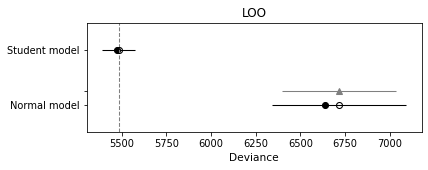

In [44]:
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

## WAIC

In [45]:
model_comparison = az.compare(model_dict, ic="waic", scale="deviance")
print(model_comparison)

               rank         waic     p_waic      d_waic        weight  \
Student model     0  5482.390487   4.607743     0.00000  1.000000e+00   
Normal model      1  6715.690056  37.915433  1233.29957  1.780649e-09   

                       se         dse  warning waic_scale  
Student model   92.927654    0.000000     True   deviance  
Normal model   375.855235  317.812298     True   deviance  


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


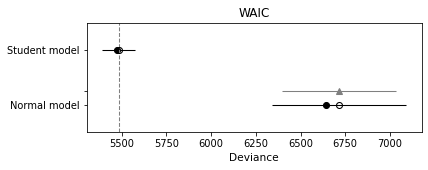

In [46]:
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()

In [47]:
model_5 = CmdStanModel(stan_file="code_5.stan")

INFO:cmdstanpy:compiling stan file /home/lab6/code_5.stan to exe file /home/lab6/code_5
INFO:cmdstanpy:compiled model executable: /home/lab6/code_5


In [59]:
data_fit = {'N': N, 
            'K': 1, 
            'y': df_2.loc[:, 
            'y[1]':f'y[{N}]'].values.reshape((N,)), 
            'X': df_2.loc[:, 
            'X[1,1]':f'X[{N},1]'].values.reshape((N,1))}

pred_1 = model_5.sample(data=data_fit, seed=2604)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [60]:
data_fit = {'N': N, 
            'K': 2, 
            'y': df_2.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N,)), 
            'X': df_2.loc[:, 
            'X[1,1]':f'X[{N},2]'].values.reshape((N,2))}

pred_2 = model_5.sample(data=data_fit, seed=2604)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [61]:
data_fit = {'N': N, 
            'K': 3, 'y': df_2.loc[:, 
            'y[1]':f'y[{N}]'].values.reshape((N,)), 
            'X': df_2.loc[:, 
            'X[1,1]':f'X[{N},3]'].values.reshape((N,3))}

pred_3 = model_5.sample(data=data_fit, seed=25042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [62]:
i_data_1 = az.from_cmdstanpy(posterior=pred_1)
i_data_2 = az.from_cmdstanpy(posterior=pred_2)
i_data_3 = az.from_cmdstanpy(posterior=pred_3)

In [63]:
model_dict = {"Model with 1 predictor": i_data_1, 
              "Model with 2 predictors": i_data_2, 
              "Model with 3 predictors": i_data_3}

In [64]:
model_comparison = az.compare(model_dict, ic="loo", scale="deviance")
print(model_comparison)

                         rank          loo     p_loo        d_loo  \
Model with 1 predictor      0  6503.702926  1.969780     0.000000   
Model with 3 predictors     1  8381.307420  3.947962  1877.604494   
Model with 2 predictors     2  8384.762659  3.008011  1881.059733   

                               weight         se        dse  warning loo_scale  
Model with 1 predictor   1.000000e+00  58.802308   0.000000    False  deviance  
Model with 3 predictors  0.000000e+00  59.863486  67.401846    False  deviance  
Model with 2 predictors  3.330669e-16  59.715134  67.108774    False  deviance  


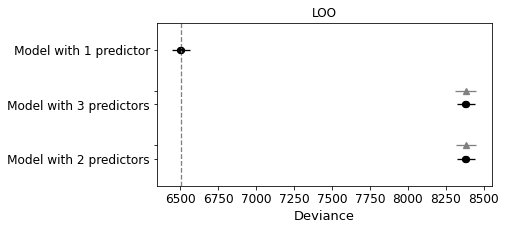

In [65]:
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

In [66]:
model_comparison = az.compare(model_dict, ic="waic", scale="deviance")
print(model_comparison)

                         rank         waic    p_waic       d_waic  \
Model with 1 predictor      0  6503.702746  1.969690     0.000000   
Model with 3 predictors     1  8381.308030  3.948267  1877.605284   
Model with 2 predictors     2  8384.762316  3.007840  1881.059570   

                               weight         se        dse  warning  \
Model with 1 predictor   1.000000e+00  58.802286   0.000000    False   
Model with 3 predictors  5.280872e-10  59.863557  67.401865    False   
Model with 2 predictors  0.000000e+00  59.715097  67.108750    False   

                        waic_scale  
Model with 1 predictor    deviance  
Model with 3 predictors   deviance  
Model with 2 predictors   deviance  


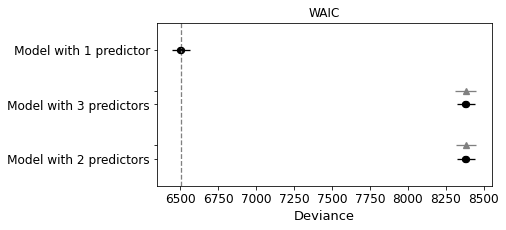

In [67]:
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()